In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score

In [72]:
dataset = pd.read_csv('neo_v2_edited.csv')

x = dataset.drop('hazardous', axis = 1).values
y = dataset['hazardous'].values

kNN = KNeighborsClassifier(n_neighbors = 20, weights = 'distance')

In [73]:
print('\n******* RISULTATI CON SCIKIT-LEARN *******')
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

kNN.fit(x_training, y_training)

predizione = kNN.predict(x_test)

print('\n------- MATRICE DI CONFUSIONE -------')

confusione = confusion_matrix(y_test, predizione)

# True hazardous
TH = confusione[1,1]   
# False hazardous
FH = confusione[0,1]
# False not hazardous
FNH = confusione[1,0]
# True not hazardous
TNH = confusione[0,0]

confusione = pd.DataFrame({"True": [TH, FH], "False": [FNH, TNH]}, index = ["True", "False"])
print(confusione)

corretti = TH + TNH
a = accuracy_score(y_test, predizione)
a_perc = a * 100
print("\nCorrectly Classified Instances (accuratezza): " + str(corretti) + " (" + str(round(a_perc, 5)) + "%)")

# Istanze classificate in modo sbagliato
sbagliati = FH + FNH
m = TH + FH + FNH + TNH
perc_sbagliati = (sbagliati / m) * 100
print("Incorrectly Classified Instances: " + str(sbagliati) + " (" + str(round(perc_sbagliati, 5)) + "%)")

# Kappa statistic
k = cohen_kappa_score(y_test, predizione)
print("Kappa statistic: " + str(round(k, 5)))

print('\n=== Detailed Accuracy By Class ===')

# Accuracy per la classe stable
print('\n--- CLASSE HAZARDOUS ---')
precision = precision_score(y_test, predizione, pos_label = True)
print('\nPrecision: ' + str(round(precision, 5)))
recall = recall_score(y_test, predizione, pos_label = True)
print('Recall: ' + str(round(recall, 5)))
f1 = f1_score(y_test, predizione, pos_label = True)
print('F1 score: ' + str(round(f1, 5)))
fallout = FH / (FH + TNH)
print('Fallout: ' + str(round(fallout, 5)))
specificity = TNH / (FH + TNH)
print('Specificity: ' + str(round(specificity, 5)))

# Accuracy per la classe stable
print('\n--- CLASSE NOT HAZARDOUS ---')
precision = precision_score(y_test, predizione, pos_label = False)
print('\nPrecision: ' + str(round(precision, 5)))
recall = recall_score(y_test, predizione, pos_label = False)
print('Recall: ' + str(round(recall, 5)))
f1 = f1_score(y_test, predizione, pos_label = False)
print('F1 score: ' + str(round(f1, 5)))
fallout = FNH / (FNH + TH)
print('Fallout: ' + str(round(fallout, 5)))
specificity = TH / (FNH + TH)
print('Specificity: ' + str(round(specificity, 5)))


******* RISULTATI CON SCIKIT-LEARN *******

------- MATRICE DI CONFUSIONE -------
       True  False
True     32    658
False    14   7523

Correctly Classified Instances (accuratezza): 7555 (91.83177%)
Incorrectly Classified Instances: 672 (8.16823%)
Kappa statistic: 0.07728

=== Detailed Accuracy By Class ===

--- CLASSE HAZARDOUS ---

Precision: 0.69565
Recall: 0.04638
F1 score: 0.08696
Fallout: 0.00186
Specificity: 0.99814

--- CLASSE NOT HAZARDOUS ---

Precision: 0.91957
Recall: 0.99814
F1 score: 0.95725
Fallout: 0.95362
Specificity: 0.04638


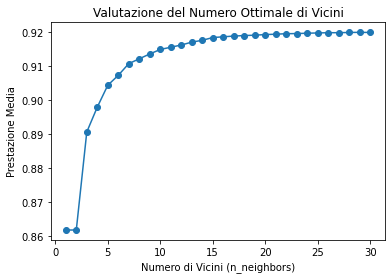

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Carica i dati
dataset = pd.read_csv('neo_v2_edited.csv')
x = dataset.drop('hazardous', axis=1).values
y = dataset['hazardous'].values

# Valori di n_neighbors da testare
neighbors_range = range(1, 31)

# Lista per memorizzare le prestazioni medie
mean_scores = []

# Esegui la cross-validation per ogni valore di n_neighbors
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')  # Utilizza la metrica che preferisci
    mean_scores.append(scores.mean())

# Grafico delle prestazioni medie
plt.plot(neighbors_range, mean_scores, marker='o')
plt.xlabel('Numero di Vicini (n_neighbors)')
plt.ylabel('Prestazione Media')
plt.title('Valutazione del Numero Ottimale di Vicini')
plt.show()


# Test su dataset di 10000

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, cohen_kappa_score, precision_score, recall_score, f1_score

dataset = pd.read_csv('neo_v2_sampled.csv')

x = dataset.drop('hazardous', axis = 1).values
y = dataset['hazardous'].values

kNN = KNeighborsClassifier(n_neighbors = 25, weights = 'distance')

In [76]:
print('\n******* RISULTATI CON SCIKIT-LEARN *******')
x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

kNN.fit(x_training, y_training)

predizione = kNN.predict(x_test)

print('\n------- MATRICE DI CONFUSIONE -------')

confusione = confusion_matrix(y_test, predizione)

# True hazardous
TH = confusione[0,0]   
# False hazardous
FH = confusione[1,0]
# False not hazardous
FNH = confusione[0,1]
# True not hazardous
TNH = confusione[1,1]

confusione = pd.DataFrame({"True": [TH, FH], "False": [FNH, TNH]}, index = ["True", "False"])
print(confusione)

corretti = TH + TNH
a = accuracy_score(y_test, predizione)
a_perc = a * 100
print("\nCorrectly Classified Instances (accuratezza): " + str(corretti) + " (" + str(round(a_perc, 5)) + "%)")

# Istanze classificate in modo sbagliato
sbagliati = FH + FNH
m = TH + FH + FNH + TNH
perc_sbagliati = (sbagliati / m) * 100
print("Incorrectly Classified Instances: " + str(sbagliati) + " (" + str(round(perc_sbagliati, 5)) + "%)")

# Kappa statistic
k = cohen_kappa_score(y_test, predizione)
print("Kappa statistic: " + str(round(k, 5)))

print('\n=== Detailed Accuracy By Class ===')

# Accuracy per la classe stable
print('\n--- CLASSE HAZARDOUS ---')
precision = precision_score(y_test, predizione, pos_label = True)
print('\nPrecision: ' + str(round(precision, 5)))
recall = recall_score(y_test, predizione, pos_label = True)
print('Recall: ' + str(round(recall, 5)))
f1 = f1_score(y_test, predizione, pos_label = True)
print('F1 score: ' + str(round(f1, 5)))
fallout = FH / (FH + TNH)
print('Fallout: ' + str(round(fallout, 5)))
specificity = TNH / (FH + TNH)
print('Specificity: ' + str(round(specificity, 5)))

# Accuracy per la classe stable
print('\n--- CLASSE NOT HAZARDOUS ---')
precision = precision_score(y_test, predizione, pos_label = False)
print('\nPrecision: ' + str(round(precision, 5)))
recall = recall_score(y_test, predizione, pos_label = False)
print('Recall: ' + str(round(recall, 5)))
f1 = f1_score(y_test, predizione, pos_label = False)
print('F1 score: ' + str(round(f1, 5)))
fallout = FNH / (FNH + TH)
print('Fallout: ' + str(round(fallout, 5)))
specificity = TH / (FNH + TH)
print('Specificity: ' + str(round(specificity, 5)))


******* RISULTATI CON SCIKIT-LEARN *******

------- MATRICE DI CONFUSIONE -------
       True  False
True   2761      4
False   233      2

Correctly Classified Instances (accuratezza): 2763 (92.1%)
Incorrectly Classified Instances: 237 (7.9%)
Kappa statistic: 0.01275

=== Detailed Accuracy By Class ===

--- CLASSE HAZARDOUS ---

Precision: 0.33333
Recall: 0.00851
F1 score: 0.0166
Fallout: 0.99149
Specificity: 0.00851

--- CLASSE NOT HAZARDOUS ---

Precision: 0.92218
Recall: 0.99855
F1 score: 0.95885
Fallout: 0.00145
Specificity: 0.99855


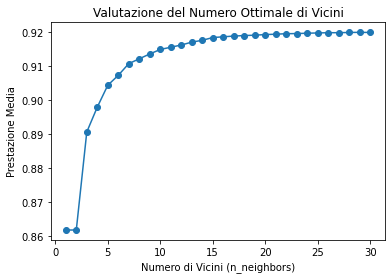

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Carica i dati
dataset = pd.read_csv('neo_v2_edited.csv')
x = dataset.drop('hazardous', axis=1).values
y = dataset['hazardous'].values

# Valori di n_neighbors da testare
neighbors_range = range(1, 31)

# Lista per memorizzare le prestazioni medie
mean_scores = []

# Esegui la cross-validation per ogni valore di n_neighbors
for n_neighbors in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')  # Utilizza la metrica che preferisci
    mean_scores.append(scores.mean())

# Grafico delle prestazioni medie
plt.plot(neighbors_range, mean_scores, marker='o')
plt.xlabel('Numero di Vicini (n_neighbors)')
plt.ylabel('Prestazione Media')
plt.title('Valutazione del Numero Ottimale di Vicini')
plt.show()
